# **Telco Custumer Churn**

**Customer Attrition**

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

**Problem Statement**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." 

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

*The data set includes information about:*

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

**Inspiration**

To explore this type of models and learn more about the subject.

Let's start with the analysis now.

In [0]:
#importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import fbeta_score, make_scorer, precision_score, recall_score, confusion_matrix, accuracy_score


In [0]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


In [0]:
telco_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

**telco_data** dataframe now has all out data that we will be using for our analysis.

In [0]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [0]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [0]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
#checking if there's null values in any column
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [0]:
telco_data.TotalCharges.value_counts()

20.2       11
           11
19.75       9
20.05       8
19.65       8
           ..
1070.15     1
4520.15     1
2070.75     1
6148.45     1
883.35      1
Name: TotalCharges, Length: 6531, dtype: int64

In [0]:
#clean TotalCharges variable

def clean_id(x):
    try:
        return float(x)
    except:
        return np.nan

In [0]:
a = telco_data.copy()
a['TotalCharges'] = a['TotalCharges'] .apply(clean_id)


Lets convert the TotalCharges's datatype to float using the **clean_id** function.

In [0]:
#exploring what could be the dirty values in the total_charges column
b = list(a[a['TotalCharges'].isnull()].index)

In [0]:
b

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [0]:
telco_data.ix[b]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [0]:
telco_data[telco_data.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [0]:
telco_data['TotalCharges'] = telco_data['TotalCharges'] .apply(clean_id)

In [0]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [0]:
#putting all object columns in object_columns to use for vizualisation purposes

object_columns = list(telco_data.select_dtypes(include=['object']).columns)
object_columns.remove('customerID')
object_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [0]:
#putting all numeric columns in numeric_columns to use for vizualisation purposes

numeric_columns = list(telco_data.select_dtypes(include=['int64', 'float64']).columns)
numeric_columns

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Visualizing all the categorical variables.

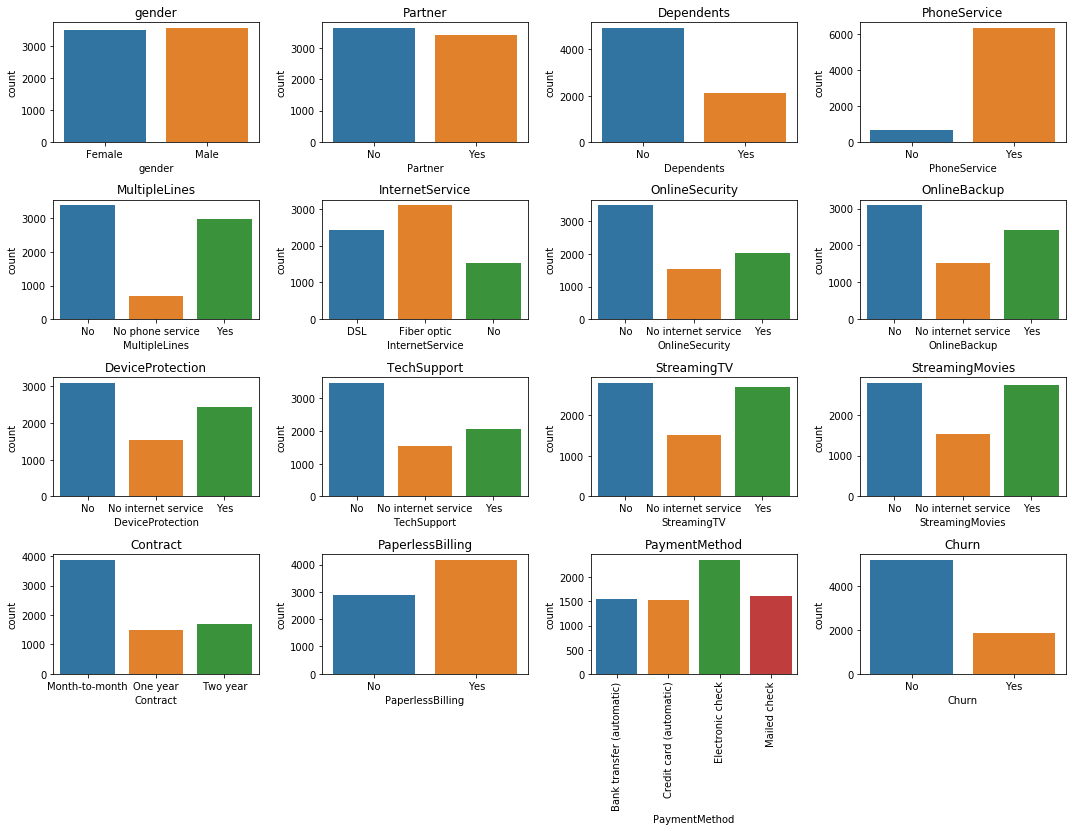

In [0]:
#visualizing all categorical variables in telco_data

fig, ax = plt.subplots(4, 4, figsize=(15, 10))
for variable, subplot in zip(object_columns, ax.flatten()):
    sns.countplot(telco_data[variable].sort_values(), ax=subplot)
    subplot.title.set_text(variable)
    plt.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

for label in ax[3,2].get_xticklabels():
  label.set_rotation(90)

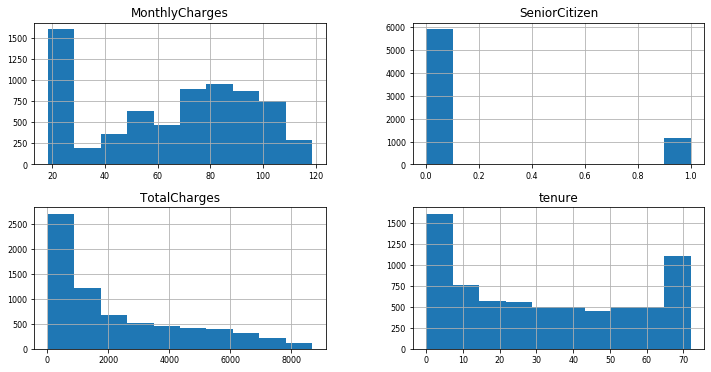

In [0]:
#vizualizing all the numeric columns

telco_data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8); 

Now lets all the churn data into a new dataframe **telco_data_churn** and all the non-churned data into **telco_data_no_churn** 

In [0]:
telco_data_churn = telco_data[telco_data['Churn']=='Yes']
telco_data_no_churn = telco_data[telco_data['Churn']=='No']


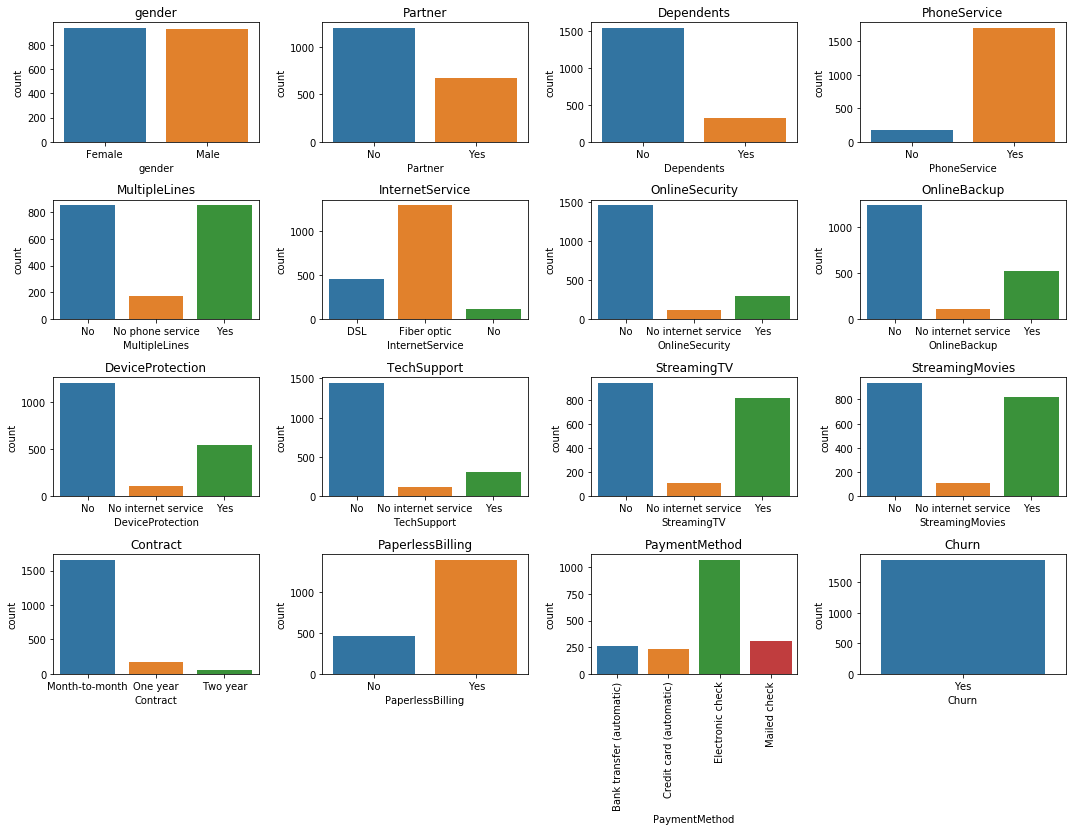

In [0]:
#visualizing all categorical variables in telco_data_churn

fig, ax = plt.subplots(4, 4, figsize=(15, 10))
for variable, subplot in zip(object_columns, ax.flatten()):
    sns.countplot(telco_data_churn[variable].sort_values(), ax=subplot)
    subplot.title.set_text(variable)
    plt.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

for label in ax[3,2].get_xticklabels():
  label.set_rotation(90)

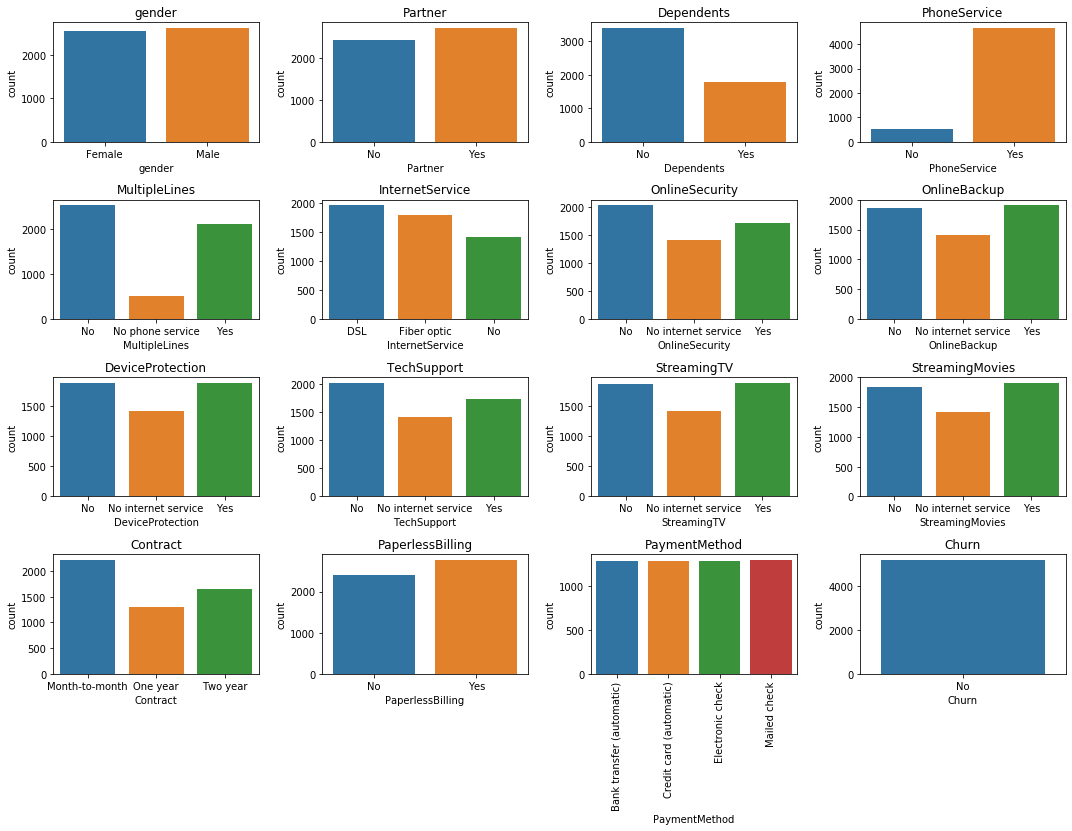

In [0]:
#vizualising all categorical variables in telco_data_no_churn

fig, ax = plt.subplots(4, 4, figsize=(15, 10))
for variable, subplot in zip(object_columns, ax.flatten()):
    sns.countplot(telco_data_no_churn[variable].sort_values(), ax=subplot)
    subplot.title.set_text(variable)
    plt.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

for label in ax[3,2].get_xticklabels():
  label.set_rotation(90)

There are lots of intuitions we can get just by looking at the visualizations of the categorical variables for Churn = 'Yes' and Churn = 'No'.

1) **Less proportion of the people who have churned have partners.** 

For churn = 'Yes', People who don't have partners are almost double than people who do

For churn = 'No', People who have partners are infact more than people who don't. Interesting observation

2) **Less proportion of the people who have churned have dependents** which is clearly evident from the size of the count plots for dependents.

3) **Higher proportion of people who have churned have 'multiple' lines** which can be seen from the size of Yes and no 

4) **Very few people among the churned ones don't use internet**. Moreover, they use fibre optic cables.

5) **Among the churned ones, very few people used online security and most of the people don't have any online backup system service. Additionally, small proportion of the churned ones have device protection and tech support.**

6) **Among the people who haven't churned and planned to stay**, they have a large proportion who haven't taken Internet service TV or movie streaming.

7) **Most of the people who have churned actually used to pay on a month to month basis**. This is so intuitive. They have the ability to leave anytime because of a monthly subscription. Also, **larger proportion of them went for paperless billing**.

8) **Most of the people who have churned used electronic check as a mode of payment**. They rarely used other modes like bank transfer, credit card, etc.

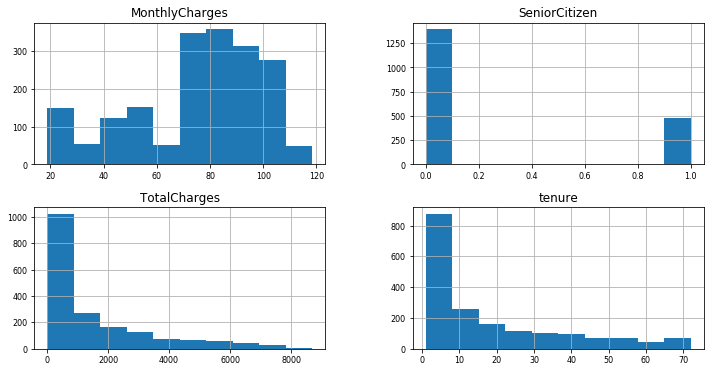

In [0]:
##vizualising all numeric variables in telco_data_churn

telco_data_churn[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8); 

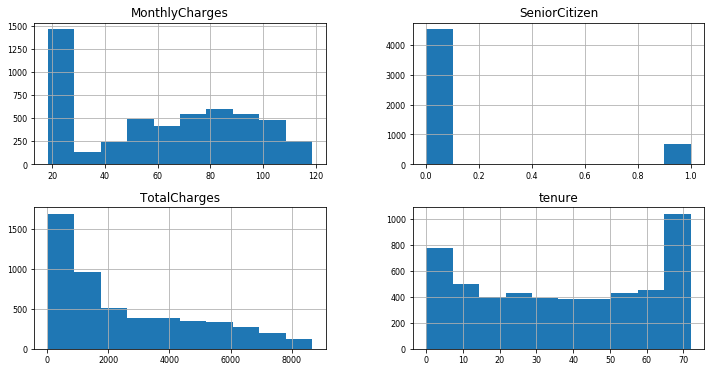

In [0]:
##vizualising all numeric variables in telco_data_no_churn

telco_data_no_churn[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8); 

In [0]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now, we have **11 null** values for **Total Charges**, so lets **impute** those with the **median** of the column. Median is a better idea because Total Charges distribution is skewed towards the right.

In [0]:
#imputing null values with median
telco_data['TotalCharges'] = telco_data['TotalCharges'].fillna(telco_data['TotalCharges'].median())

In [0]:
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

From the plots of the numerical variables, we can see that most of the **people who have churned** lie on the **high monthly charges** area and **low tenure** area.

So most of these people wouldn't have been a longer customer and would have used more services which has amounted to high monthly charges.

Now, lets build a **model** to predict whether the customer will churn. The model and the variable importances it takes will give us a lot of intuitions for analysis.

In [0]:
#Putting predicors data in X, churn values in y

#using one hot encoding to encode categorical variables

X = telco_data.copy().drop(columns = ['customerID'])
y = X['Churn']

labelencoder = LabelEncoder()
y = pd.Series(labelencoder.fit_transform(y))

dummy_cols = object_columns.copy()
dummy_cols.remove('Churn')

X =  pd.get_dummies(X, columns = dummy_cols).drop(columns = ['Churn'])


In [0]:
print(X.head())
print(y.head())

   SeniorCitizen  ...  PaymentMethod_Mailed check
0              0  ...                           0
1              0  ...                           1
2              0  ...                           1
3              0  ...                           0
4              0  ...                           0

[5 rows x 45 columns]
0    0
1    0
2    1
3    0
4    1
dtype: int64


In [0]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


Splitting X and y into training and test sets for analysis

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100,shuffle = True, stratify = y, test_size = 0.25)

In [0]:
X_train.isnull().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBack

In [0]:
y_train

2707    1
3901    0
1514    0
6349    0
1346    1
       ..
2422    0
278     0
4637    0
928     0
1332    0
Length: 5282, dtype: int64

Now, we will use a **Random Forest Classfier** with **GridSearchCV** to tune the hyperparameters of the model for the best model on cross-validation sets.

Since, the data is **imbalanced**, the metric we will use is **roc_auc** score to analyze the best model.

In [0]:
clf = RandomForestClassifier()

# use a full grid over all parameters
param_grid = {'n_estimators' : [50, 100],
              "max_features": [1, 3, 7, 11, 15],
              
              }
#f1 = make_scorer(f1_score , average='weighted')
# run grid search
grid = GridSearchCV(clf, param_grid, cv=5,scoring='roc_auc')

grid.fit(X_train, y_train)
print("Grid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC)): {:.3f}".format(grid.best_score_))
#print("feature importances: {:.3f}".format(grid.best_estimator_.feature_importances_))

grid.best_estimator_.feature_importances_

Grid-Search with AUC
Best parameters: {'max_features': 15, 'n_estimators': 100}
Best cross-validation score (AUC)): 0.827


array([0.01827601, 0.13533112, 0.15582733, 0.17530109, 0.01589344,
       0.01696218, 0.01379946, 0.01309016, 0.01130394, 0.01145328,
       0.00266786, 0.00281799, 0.01109939, 0.00277574, 0.01129865,
       0.00834404, 0.03066678, 0.0006412 , 0.03846612, 0.00097767,
       0.00804091, 0.01282845, 0.00114242, 0.0110502 , 0.01084271,
       0.00077752, 0.00988236, 0.03703089, 0.00035377, 0.00788226,
       0.00902574, 0.00035713, 0.00886588, 0.00994288, 0.00053468,
       0.00935882, 0.08108457, 0.00527058, 0.0098174 , 0.01445395,
       0.01463202, 0.01034809, 0.01073822, 0.02775366, 0.01099147])

In [0]:
# fitting randomforest again with the best hyperparameters received from gridsearchcv
rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_features = 7)
rnd_clf.fit(X_train, y_train)
#for name, importance in zip(list(X_train.columns), rnd_clf.feature_importances_):
 # print(name, "=", importance)
 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Now, lets see the performance on the test set and visualize the **classification report** and **confusion matrix**.

In [0]:
y_pr=rnd_clf.predict(X_test)
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, rnd_clf.predict_proba(X_test)[:, 1])))

print(classification_report(y_test, y_pr,target_names=["0","1"]))
confusion_matrix(y_test, y_pr)

Test set AUC: 0.810
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1294
           1       0.60      0.48      0.53       467

    accuracy                           0.78      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.77      0.78      0.77      1761



array([[1146,  148],
       [ 244,  223]])

Now, lets plot the precision and recall VS different thresholds and the ROC curve.

In [0]:
thresholds = np.linspace(0, 1, 100)
y_scores = rnd_clf.predict_proba(X_test)[:, 1]
scores = []
for threshold in thresholds:
    y_hat = (y_scores > threshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=y_test.values),
                 precision_score(y_pred=y_hat, y_true=y_test.values),
                 fbeta_score(y_pred=y_hat, y_true=y_test.values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.7300884955752213 13


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


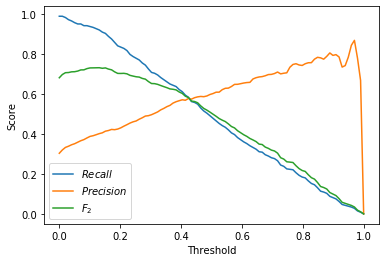

In [0]:
#plotting precision, recall vs thresholds

plt.plot(thresholds, scores[:, 0], label='$Recall$')
plt.plot(thresholds, scores[:, 1], label='$Precision$')
plt.plot(thresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

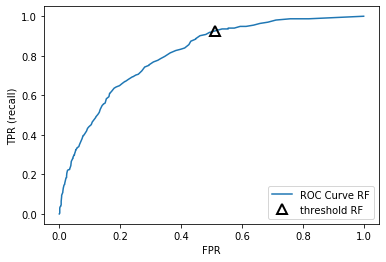

In [0]:
#plotting ROC curve

from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rnd_clf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")


F_2 = list(scores[:, 2])
close_default_rf = thresholds[F_2.index(max(F_2))]
close_default_rf = np.argmin(np.abs(thresholds_rf - close_default_rf))



plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label="threshold RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

Now, lets visualize the **top features** our random forest learnt while modelling. This will give us an idea of important predictors required to predict Churn.

We will use **feature_importance** to visualize the same.

In [0]:
features = list(X_train.columns)
importances = list(rnd_clf.feature_importances_)
feature_importances_df = pd.DataFrame({'feature' : features, 'importance' : importances})
feature_importances_df = feature_importances_df.sort_values(by = 'importance', ascending=False)

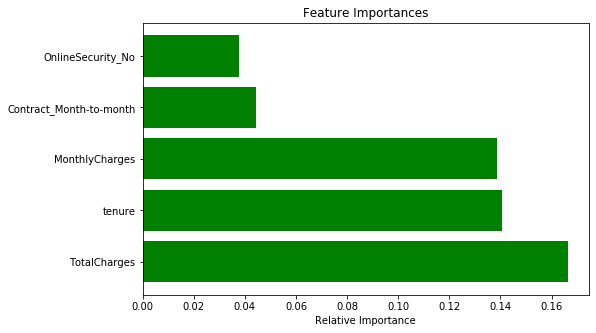

In [0]:
#plotting top 5 features learnt.

plt.figure(figsize=(8, 5))
plt.title('Feature Importances')
plt.barh(range(0,5), feature_importances_df['importance'][0:5], color='green', align='center')
plt.yticks(range(0,5), [i for i in feature_importances_df.feature[0:5]])
plt.xlabel('Relative Importance')
plt.show()

Now, let us plot an instance of the decision forest which is a tree in order to gain an intuition of how it is classifying the datapoints.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


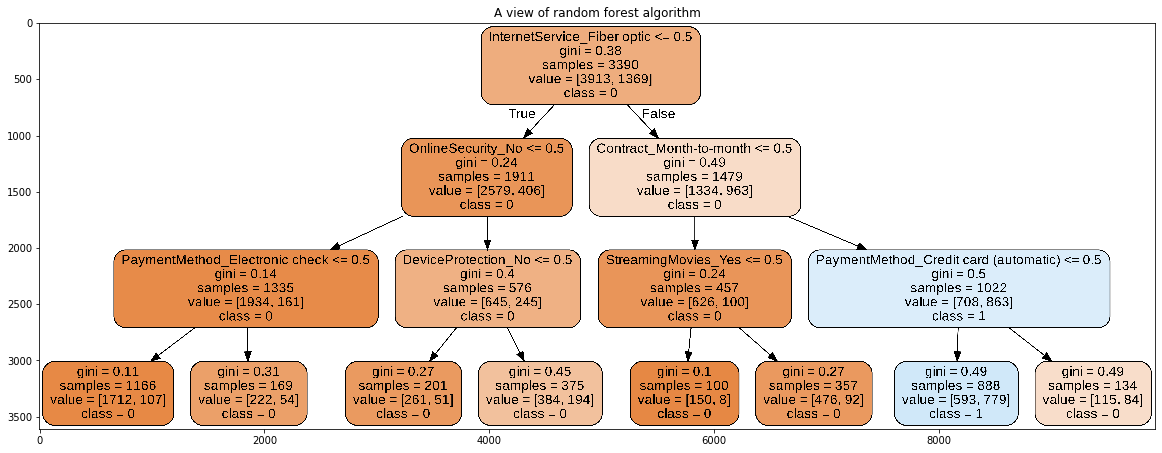

In [0]:
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import io

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

dot_data = io.StringIO()
estimator = rnd_clf.estimators_[70]
export_graphviz(estimator, 
                out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)
filename = "tree.png"
plt.figure(figsize=(20,15))
plt.title('A view of random forest algorithm')

img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()

In [0]:
telco_data[telco_data['Churn'] == 'Yes'].shape[0]/telco_data.shape[0]

0.2653698707936959

**26.5%** of our data has customers who churned. Now, let us try Logistic Regression once and also use oversampling techniques and see what results we get.

In [0]:
#logistic regression

clf = LogisticRegression()

# use a full grid over all parameters
param_grid = {'penalty' : ['l1', 'l2'],
              "C": [0.1,1,10]
              }
f1 = make_scorer(f1_score , average='weighted')
# run grid search
grid = GridSearchCV(clf, param_grid, cv=5,scoring='roc_auc')

grid.fit(X_train, y_train)
print("Grid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC)): {:.3f}".format(grid.best_score_))
#print("feature importances: {:.3f}".format(grid.best_estimator_.feature_importances_))

#grid.best_estimator_.feature_importances_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Grid-Search with AUC
Best parameters: {'C': 10, 'penalty': 'l2'}
Best cross-validation score (AUC)): 0.847


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:

y_predict = grid.predict(X_test)
print('The AUC score with the best hyperparameters is ', end = '')
print(roc_auc_score(y_test, y_predict))

print ("Classification Report: ")
print (classification_report(y_test, y_predict))

The AUC score with the best hyperparameters is 0.714970924941006
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1294
           1       0.63      0.55      0.58       467

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.79      0.79      0.79      1761



Clearly, Random Forest performed a lot better than Logistic Regression.

In [0]:
confusion_matrix(y_test, y_predict)

array([[1141,  153],
       [ 211,  256]])

Now, before using oversampling techniques, lets try to vizualize our data usiing **PCA** , **LDA** and **T-SNE** on 2 dimentions to understad the distribution of the data and see if oversampling can be applied without getting a lot of bias.

In [0]:
#using standard scaler as a preprocessig step for PCA

df = X.copy()
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df))


In [0]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,-0.439916,-1.277445,-1.160323,-0.994242,1.009559,-1.009559,-1.034530,1.034530,0.654012,-0.654012,3.054010,-3.054010,-0.963330,3.054010,-0.854176,1.381712,-0.885660,-0.525927,1.006696,-0.525927,-0.633933,-0.883620,-0.525927,1.378241,1.129427,-0.525927,-0.723968,1.013869,-0.525927,-0.639439,1.227357,-0.525927,-0.790132,1.236489,-0.525927,-0.796070,0.904184,-0.514249,-0.562975,-0.829798,0.829798,-0.529885,-0.525047,1.406418,-0.544807
1,-0.439916,0.066327,-0.259629,-0.173244,-0.990532,0.990532,0.966622,-0.966622,0.654012,-0.654012,-0.327438,0.327438,1.038066,-0.327438,-0.854176,1.381712,-0.885660,-0.525927,-0.993349,-0.525927,1.577454,1.131709,-0.525927,-0.725563,-0.885405,-0.525927,1.381277,1.013869,-0.525927,-0.639439,1.227357,-0.525927,-0.790132,1.236489,-0.525927,-0.796070,-1.105970,1.944582,-0.562975,1.205113,-1.205113,-0.529885,-0.525047,-0.711026,1.835513
2,-0.439916,-1.236724,-0.362660,-0.959674,-0.990532,0.990532,0.966622,-0.966622,0.654012,-0.654012,-0.327438,0.327438,1.038066,-0.327438,-0.854176,1.381712,-0.885660,-0.525927,-0.993349,-0.525927,1.577454,-0.883620,-0.525927,1.378241,1.129427,-0.525927,-0.723968,1.013869,-0.525927,-0.639439,1.227357,-0.525927,-0.790132,1.236489,-0.525927,-0.796070,0.904184,-0.514249,-0.562975,-0.829798,0.829798,-0.529885,-0.525047,-0.711026,1.835513
3,-0.439916,0.514251,-0.746535,-0.194766,-0.990532,0.990532,0.966622,-0.966622,0.654012,-0.654012,3.054010,-3.054010,-0.963330,3.054010,-0.854176,1.381712,-0.885660,-0.525927,-0.993349,-0.525927,1.577454,1.131709,-0.525927,-0.725563,-0.885405,-0.525927,1.381277,-0.986321,-0.525927,1.563872,1.227357,-0.525927,-0.790132,1.236489,-0.525927,-0.796070,-1.105970,1.944582,-0.562975,1.205113,-1.205113,1.887201,-0.525047,-0.711026,-0.544807
4,-0.439916,-1.236724,0.197365,-0.940470,1.009559,-1.009559,0.966622,-0.966622,0.654012,-0.654012,-0.327438,0.327438,1.038066,-0.327438,-0.854176,-0.723740,1.129102,-0.525927,1.006696,-0.525927,-0.633933,1.131709,-0.525927,-0.725563,1.129427,-0.525927,-0.723968,1.013869,-0.525927,-0.639439,1.227357,-0.525927,-0.790132,1.236489,-0.525927,-0.796070,0.904184,-0.514249,-0.562975,-0.829798,0.829798,-0.529885,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.128655,-0.990532,0.990532,-1.034530,1.034530,-1.529024,1.529024,-0.327438,0.327438,-0.963330,-0.327438,1.170719,1.381712,-0.885660,-0.525927,-0.993349,-0.525927,1.577454,1.131709,-0.525927,-0.725563,-0.885405,-0.525927,1.381277,-0.986321,-0.525927,1.563872,-0.814759,-0.525927,1.265612,-0.808742,-0.525927,1.256171,-1.105970,1.944582,-0.562975,-0.829798,0.829798,-0.529885,-0.525047,-0.711026,1.835513
7039,-0.439916,1.613701,1.277533,2.243151,1.009559,-1.009559,-1.034530,1.034530,-1.529024,1.529024,-0.327438,0.327438,-0.963330,-0.327438,1.170719,-0.723740,1.129102,-0.525927,1.006696,-0.525927,-0.633933,-0.883620,-0.525927,1.378241,-0.885405,-0.525927,1.381277,1.013869,-0.525927,-0.639439,-0.814759,-0.525927,1.265612,-0.808742,-0.525927,1.256171,-1.105970,1.944582,-0.562975,-0.829798,0.829798,-0.529885,1.904590,-0.711026,-0.544807
7040,-0.439916,-0.870241,-1.168632,-0.854469,1.009559,-1.009559,-1.034530,1.034530,-1.529024,1.529024,3.054010,-3.054010,-0.963330,3.054010,-0.854176,1.381712,-0.885660,-0.525927,-0.993349,-0.525927,1.577454,1.131709,-0.525927,-0.725563,1.129427,-0.525927,-0.723968,1.013869,-0.525927,-0.639439,1.227357,-0.525927,-0.790132,1.236489,-0.525927,-0.796070,0.904184,-0.514249,-0.562975,-0.829798,0.829798,-0.529885,-0.525047,1.406418,-0.544807
7041,2.273159,-1.155283,0.320338,-0.872062,-0.990532,0.990532,-1.034530,1.034530,0.654012,-0.654012,-0.327438,0.327438,-0.963330,-0.327438,1.170719,-0.723740,1.129102,-0.525927,1.006696,-0.525

In [0]:
#visualizing using PCA

pca_df = pd.DataFrame(y.copy())
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
pca_df['pca-one'] = pca_result[:,0]
pca_df['pca-two'] = pca_result[:,1] 
pca_df.columns = ['Churn','pca-one', 'pca-two']
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.25233265 0.1350128 ]


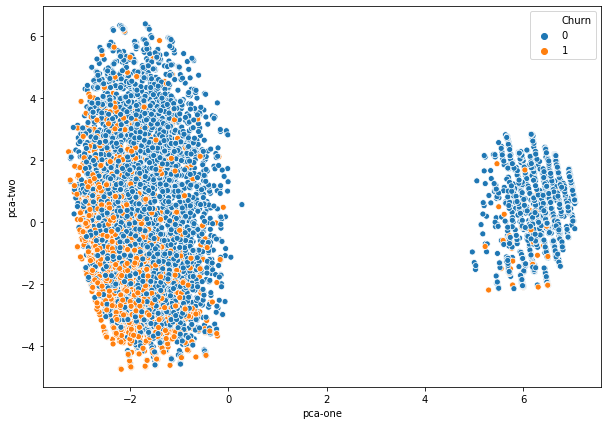

In [0]:
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x="pca-one", y="pca-two",hue='Churn', data=pca_df)

We can see that the churn=1 data are mostly together and churn=0 data are in their cluster though they look dispersed a bit.

In [0]:
pca_df

,Churn,pca-one,pca-two
0,0,-1.999289,-3.070684
1,0,-0.332740,-1.207479
2,1,-0.864345,-2.904903
3,0,-1.062056,-0.108205
4,1,-1.837096,-4.210776
...,...,...,...
7038,0,-1.223623,3.068060
7039,0,-2.393543,4.339526
7040,0,-1.660906,-2.320209
7041,1,-1.973834,-2.718336


Now, lets vizualize using **Linear Discrimant Analysis**

In [0]:
df1 = df.copy()
lda_df = y.copy()
lda = LDA()
lda_X = lda.fit_transform(df1, lda_df)

In [0]:
plot_df = pd.DataFrame(lda_X)
plot_df.columns = ['lda_component']
churn = pd.DataFrame(lda_df)
plot_df = plot_df.join(churn)
plot_df.columns = ['lda_component', 'Churn']
plot_df.head()

,lda_component,Churn
0,1.023057,0
1,-1.189470,0
2,0.214990,1
3,-1.348333,0
4,1.813137,1


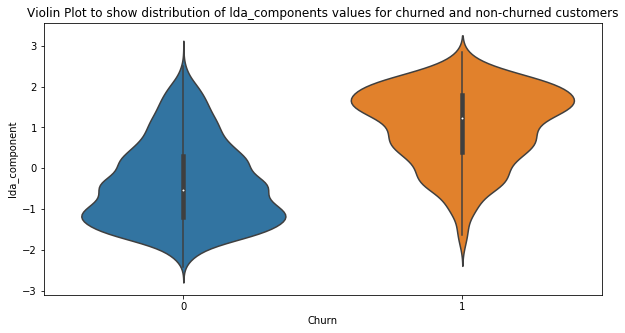

In [0]:
plt.figure(figsize=(10, 5))
plt.title('Violin Plot to show distribution of lda_components values for churned and non-churned customers')
sns.violinplot(x="Churn", y="lda_component", data=plot_df)

Well, clearly we can see the difference in what LDA component leaned for churn = 1 vs churn = 0

Text(0, 0.5, 'Lda_component')

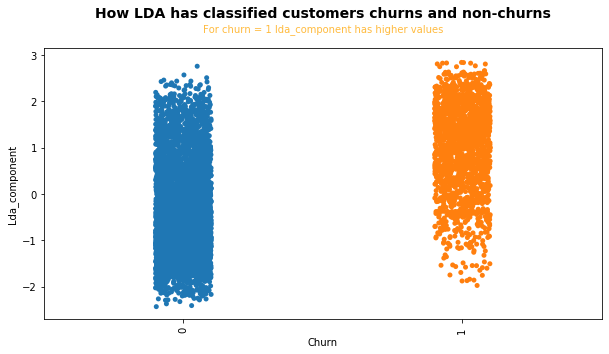

In [0]:
plt.figure(figsize=(10, 5))
ax = sns.stripplot(x="Churn", y="lda_component", jitter = True, data=plot_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.text(x=0.5, y=1.1, s='How LDA has classified customers churns and non-churns', fontsize=14, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='For churn = 1 lda_component has higher values', fontsize=10, alpha=0.75,color='orange', ha='center', va='bottom', transform=ax.transAxes)
ax.set_xlabel('Churn', fontsize = 10)
ax.set_ylabel('Lda_component', fontsize = 10)

Now, let us do one last vizualization using T-SNE

In [0]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=50)

tsne_features = model.fit_transform(df)
#print(tsne_features.head())

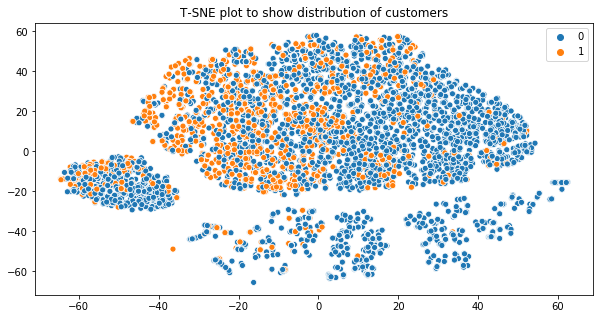

In [0]:
plt.figure(figsize=(10, 5))
plt.title('T-SNE plot to show distribution of customers')
sns.scatterplot(x = tsne_features[:,0], y = tsne_features[:,1], hue = y)
plt.show()


T-sne has beatifully plotted the different datapoints and we can see how the 2 types of people are at some specific areas together. Now that we have visualized our data and saw that the data is not so intermingled, let us use some **oversampling** techniques like **SMOTE** and **ADYSYN** to get more datapoints so that our data becomes balanced before modelling using random forest to predict churn.

In [0]:
df.shape

(7043, 45)

In [0]:
y_train.shape

(5282,)

In [0]:
pip install -U imbalanced-learn

     |████████████████████████████████| 163kB 2.7MB/s 
     |████████████████████████████████| 7.0MB 8.7MB/s 
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [0]:
#importing SMOTE
from imblearn.over_sampling import SMOTE


In [0]:
X_over_sampling = X.copy()
scaler = StandardScaler()
X_over_sampling = pd.DataFrame(scaler.fit_transform(X_over_sampling))

In [0]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Length: 7043, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_over_sampling,y,random_state=100,shuffle = True, stratify = y, test_size = 0.25)

In [0]:
#defining smote function
def makeOverSamplesSMOTE(X,y):
  from imblearn.over_sampling import SMOTE
  sm = SMOTE()
  X, y = sm.fit_sample(X, y)
  return X,y

In [0]:
X_over_sampling,y_sampling = makeOverSamplesSMOTE(X_train,y_train)

In [0]:
X_over_sampling.shape

(7760, 45)

In [0]:
y_sampling.shape

(7760,)

Now that we have oversampled our data and made it balanced, lets model it using accuracy as a metric.

In [0]:
clf = RandomForestClassifier()

# use a full grid over all parameters
param_grid = {'n_estimators' : [50, 100],
              "max_features": [1, 3, 7, 11, 15],
              
              }
#f1 = make_scorer(f1_score , average='weighted')
# run grid search
grid = GridSearchCV(clf, param_grid, cv=5,scoring='accuracy')

grid.fit(X_over_sampling, y_sampling)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
#print("feature importances: {:.3f}".format(grid.best_estimator_.feature_importances_))

grid.best_estimator_.feature_importances_

Grid-Search with accuracy
Best parameters: {'max_features': 1, 'n_estimators': 100}
Best cross-validation score (accuracy)): 0.859


array([0.02026533, 0.10246393, 0.10548009, 0.11462162, 0.01685368,
       0.01714359, 0.01807136, 0.0189561 , 0.01465389, 0.01444585,
       0.0023797 , 0.0022049 , 0.01341844, 0.00256343, 0.01308655,
       0.01830843, 0.02376754, 0.00578093, 0.03056733, 0.00236124,
       0.02342046, 0.02392451, 0.00433196, 0.01625947, 0.01791191,
       0.00483754, 0.01305665, 0.02960752, 0.00550945, 0.02200201,
       0.01271588, 0.00771176, 0.01118053, 0.01027013, 0.00687107,
       0.01168283, 0.05198508, 0.02039359, 0.03012766, 0.01874157,
       0.02485903, 0.01590118, 0.01745067, 0.02979114, 0.01206247])

In [0]:
y_pr=rnd_clf.predict(X_test)
print(accuracy_score(y_pr,y_test))
print(classification_report(y_test, y_pr,target_names=["0","1"]))
confusion_matrix(y_test, y_pr)

0.6933560477001703
              precision    recall  f1-score   support

           0       0.88      0.67      0.76      1294
           1       0.45      0.75      0.56       467

    accuracy                           0.69      1761
   macro avg       0.67      0.71      0.66      1761
weighted avg       0.77      0.69      0.71      1761



array([[871, 423],
       [117, 350]])

The accuracy is not very good in the test set. We only oversampled our training set and we have 86% accuracy there. We dint oversample our test as it could have led to **data leakage**.

In [0]:
X = telco_data.copy().drop(columns = ['customerID'])
y = X['Churn']

labelencoder = LabelEncoder()
y = pd.Series(labelencoder.fit_transform(y))

dummy_cols = object_columns.copy()
dummy_cols.remove('Churn')

X =  pd.get_dummies(X, columns = dummy_cols).drop(columns = ['Churn'])



In [0]:
#importing adasyn
from imblearn.over_sampling import ADASYN


In [0]:
X_over_sampling_adasyn = X.copy()
scaler = StandardScaler()
X_over_sampling_adasyn = pd.DataFrame(scaler.fit_transform(X_over_sampling_adasyn))

In [0]:
X_over_sampling_adasyn.shape

(7043, 45)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_over_sampling_adasyn,y,random_state=100,shuffle = True, stratify = y, test_size = 0.25)

In [0]:
def makeOverSamplesADASYN(X,y):

  from imblearn.over_sampling import ADASYN 
  sm = ADASYN()
  X, y = sm.fit_sample(X, y)
  return(X,y)

In [0]:
X_over_sampling_adasyn,y_sampling_adasyn = makeOverSamplesADASYN(X_train,y_train)

In [0]:
clf = RandomForestClassifier()

# use a full grid over all parameters
param_grid = {'n_estimators' : [50, 100],
              "max_features": [1, 3, 7, 11, 15],
              
              }
#f1 = make_scorer(f1_score , average='weighted')
# run grid search
grid = GridSearchCV(clf, param_grid, cv=5,scoring='accuracy')

grid.fit(X_over_sampling_adasyn, y_sampling)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
#print("feature importances: {:.3f}".format(grid.best_estimator_.feature_importances_))

grid.best_estimator_.feature_importances_

Grid-Search with accuracy
Best parameters: {'max_features': 1, 'n_estimators': 100}
Best cross-validation score (accuracy)): 0.857


array([0.01921707, 0.10512393, 0.10642367, 0.11864868, 0.01895451,
       0.01971004, 0.01873133, 0.01801342, 0.01588573, 0.0159304 ,
       0.00251329, 0.00222807, 0.01613117, 0.00238101, 0.01520864,
       0.01557456, 0.02008739, 0.00329642, 0.02913831, 0.00560462,
       0.024034  , 0.02320334, 0.00530328, 0.01692341, 0.01666373,
       0.00438227, 0.0150753 , 0.02618973, 0.00807526, 0.02464833,
       0.01343676, 0.00481202, 0.01230995, 0.01354678, 0.00400656,
       0.01193704, 0.03973388, 0.02147879, 0.02907464, 0.01920337,
       0.02054459, 0.01701031, 0.01774027, 0.02918446, 0.01267966])

In [0]:
y_pr=rnd_clf.predict(X_test)
print(accuracy_score(y_pr,y_test))
print(classification_report(y_test, y_pr,target_names=["0","1"]))
confusion_matrix(y_test, y_pr)

0.6933560477001703
              precision    recall  f1-score   support

           0       0.88      0.67      0.76      1294
           1       0.45      0.75      0.56       467

    accuracy                           0.69      1761
   macro avg       0.67      0.71      0.66      1761
weighted avg       0.77      0.69      0.71      1761



array([[871, 423],
       [117, 350]])

Even adasyn has a bad accuracy score on test set. Though its not fair to compare the results from over sampling techniques and the model which we build just in our original dataset using AUC metric, it all depends on the company and their goals. 

**The random forest model on the original dataset can be used by controlling the thresholds to predict the probability of churn to use it for useful business insights.**